In [9]:
# Get torch modules and others.
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms, utils, datasets
from tqdm import tqdm
import copy, math, time
from torch.nn.parameter import Parameter
from torch.autograd import Variable
from PIL import Image
import io, os, zipfile, csv
from torch.utils.data.sampler import SubsetRandomSampler
import pdb
from random import randint
import string, random

In [2]:
numbers = datasets.MNIST(".\\MNIST\\", download=True, transform=transforms.Compose([
    transforms.ToTensor(),
    #transforms.Grayscale()
]))

In [3]:
toPIL = transforms.ToPILImage()  

def display(tensor, title=None):
    image = tensor.cpu().clone()  
    image = image.squeeze(0)    
    image = toPIL(image)
    plt.figure(figsize=(8, 8))
    plt.imshow(image, cmap="gray")
    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title)
    plt.show()

In [4]:
def rand_name():
    return ''.join(random.choices(string.ascii_letters + string.digits, k=16))

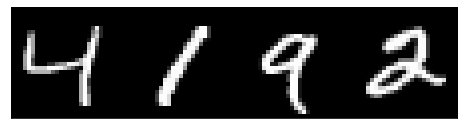

In [5]:
display(torch.cat((numbers[2][0], numbers[3][0], numbers[4][0], numbers[5][0]), dim=2))

In [6]:
def get_rand_num(length=4):
    n = len(numbers)
    c = [randint(0, n) for i in range(length)]
    rand_tensors = [numbers[c[i]][0] for i in range(length)]
    rand_string = " ".join([str(numbers[c[i]][1]) for i in range(length)])
    return torch.cat(rand_tensors, dim=2), rand_string

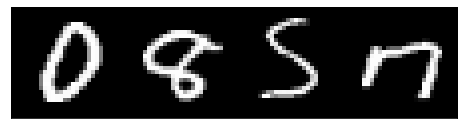

0 8 5 7


In [7]:
data = get_rand_num()
display(data[0])
print(data[1])

In [14]:
file = "train.txt"
formula_file = "formulas.txt"
file_data = list()
formula_data = list()
for i in range(200):
    the_num = get_rand_num()
    image_name = rand_name()
    rand_file = ".\\formulas\\" + image_name + ".png"
    file_data.append(f"{i} {image_name}")
    formula_data.append(the_num[1])
    utils.save_image(the_num[0], rand_file)
    
with open(file, 'w') as file:
    file.write("\n".join(file_data))
    
with open(formula_file, 'w') as file:
    file.write("\n".join(formula_data))